DEBUG: nvcc STDOUT mod.cu
   Creating library E:/Users/DeepLearning/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.11-64/tmpbwlili/265abc51f7c376c224983485238ff1a5.lib and object E:/Users/DeepLearning/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.11-64/tmpbwlili/265abc51f7c376c224983485238ff1a5.exp

Using gpu device 0: GeForce GTX 780 (CNMeM is enabled with initial size: 90.0% of memory, CuDNN 3007)
E:\Users\DeepLearning\Anaconda2\Lib\site-packages\theano\tensor\signal\downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


... loading data
        lesion_id nmenh_dist nmenh_intenh
count        8884       8884         8884
unique        500          6            4
top           576        N/A          N/A
freq           25       4150         8182
[(u'Ductal', 0), (u'Focal', 1), (u'Linear', 2), (u'N/A', 3), (u'Regional', 4), (u'Segmental', 5)]
Removing incomplete patches...
[505, 951, 1467, 1818, 2040, 3220, 3789, 4112, 4924, 5068, 6067, 8838]


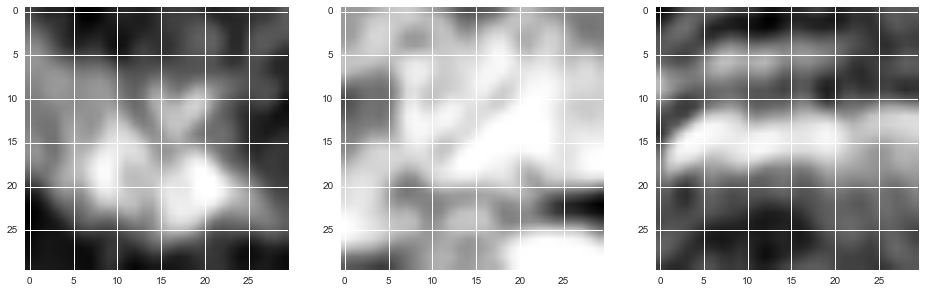

Number of patches: 5302 train, 1760 valid, 1810 test
... building the Stacked Autoenconder model
... getting the pretraining functions
... pre-training the model
Pre-training layer 0, epoch 0, cost 518.878052
Pre-training layer 0, epoch 1, cost 516.255005
Pre-training layer 0, epoch 2, cost 516.339783
Pre-training layer 0, epoch 3, cost 516.736694
Pre-training layer 0, epoch 4, cost 516.998962
Pre-training layer 0, epoch 5, cost 516.847717
Pre-training layer 0, epoch 6, cost 516.615173
Pre-training layer 0, epoch 7, cost 517.445374
Pre-training layer 0, epoch 8, cost 517.775574
Pre-training layer 0, epoch 9, cost 519.004700

In [ ]:

from DeepLearnFuncs import *
import six.moves.cPickle as cPickle

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (16, 10)

# start by importing Deep Learning Funcs
funcs = DeepLearnFuncs()

pretraining_epochs = 100
pretrain_lr = 0.095
finetune_lr = 0.25

training_epochs = 1000
batch_size = 2

output_folder = 'plots/SdA_plots'
corruption_levels=[0.1, 0.15, 0.2]

    
############
# train Stacked dAutoencoder                 
############
dfpredata, dfinedata = funcs.test_SdA(finetune_lr, pretraining_epochs, pretrain_lr, training_epochs, batch_size, corruption_levels, output_folder)


In [ ]:
############
### plotting or cost
### the cost we minimize during training is the negative log likelihood of
############
plt.figure()
sns.lmplot('iter', 'LL_iter', data=dfpredata, hue='layer', fit_reg=False)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('dA Cost', fontsize=14)
plt.title('Pretraining Stacked dAutoencoder learn_rate = '+str(pretrain_lr)+' pretrain_epochs = '+str(pretraining_epochs), fontsize=14)


In [ ]:
############
### plotting likelihood or cost FIne tunning
### the cost we minimize during training is the negative log likelihood of
############
x = dfinedata['iter'].values
y = dfinedata['LL_iter'].values
plt.figure()
plt.plot(x, y, 'bo--')
plt.xlabel('iterations', fontsize=14)
plt.ylabel('negative log likelihood', fontsize=14)
plt.title('Fine Tunning: finetune_lr = '+str(finetune_lr)+' batch_size = '+str(batch_size), fontsize=14)

x = dfinedata['iter'].values
y = dfinedata['loss'].values
plt.figure()
plt.plot(x, y, 'bo--')
plt.xlabel('iterations')
plt.ylabel('Validation 0-1-loss %')
plt.title('Fine Tunning: finetune_lr = '+str(finetune_lr)+' batch_size = '+str(batch_size), fontsize=14)
